# Heatmaps for all codon positions across Rep and CMV libraries

In [1]:
import os 
import sys 

import pandas as pd 
pd_idx =pd.IndexSlice
import numpy as np
import seaborn as sns 
from matplotlib import (gridspec,
                        ticker,
                        pyplot as plt)
from scipy.stats import variation
from scipy.stats import ks_2samp,mannwhitneyu,pearsonr

import common
from common import DESIRED_AA_COD_ORD
from common import plot_heatmap
sys.path.append('../x01_process_data/')
import x02_load_dataframes
import x03_compute_selections
sys.path.append('../settings/')
from paths_new import FIGURES_DIR
from paths_new import META_DIR
from paths_new import DESIRED_AA_ORD
from paths_new import WT_PLOTTING_DF
from paper_settings import PAPER_PRESET
from paper_settings import PAPER_FONTSIZE
from paper_settings import save_fig

PAPER_PRESET['font'] = 'monospace'
sns.set(**PAPER_PRESET)

%reload_ext autoreload
%autoreload 2

In [2]:
packaging_counts = x02_load_dataframes.load_packaging_df()
packaging_counts.head()

promoter                                                                                                   CMV  \
source                                                                                                 plasmid   
virus_rep                                                                                                    0   
tech_rep                                                                                                   p-a   
measurement                                                                                              count   
gen_id                                                                                             GEN00105092   
abs_pos tile_num aa is_wt_aa is_wt_codon wt_bc lib_type enzyme codon aa-codon barcode                            
1.0     0.0      *  0        0           0     sub      bbsi   TAA   *-TAA    CACTGTCACACACTGACACT       574.0   
                                                                              CTGTGAGTGTGAGAGACACT       685.0   
                                                               TAG   *-TAG    CTCTCACACAGTGAGTCTGA       112.0   
                                                                              CAGAGACAGAGTCTGTCACT       128.0   
                                                               TGA   *-TGA    ACACTGTCTCTGTCAGACAG      1077.0   

promoter                                                                                                        \
source                                                                                                           
virus_rep                                                                                                        
tech_rep                                                                                                   p-b   
measurement                                                                                              count   
gen_id                                                                                             GEN00113847   
abs_pos tile_num aa is_wt_aa is_wt_codon wt_bc lib_type enzyme codon aa-codon barcode                            
1.0     0.0      *  0        0           0     sub      bbsi   TAA   *-TAA    CACTGTCACACACTGACACT       556.0   
                                                                              CTGTGAGTGTGAGAGACACT       600.0   
                                                               TAG   *-TAG    CTCTCACACAGTGAGTCTGA        59.0   
                                                                              CAGAGACAGAGTCTGTCACT       145.0   
                                                               TGA   *-TGA    ACACTGTCTCTGTCAGACAG      1127.0   

promoter                                                                                                        \
source                                                                                                           
virus_rep                                                                                                        
tech_rep                                                                                                   p-c   
measurement                                                                                              count   
gen_id                                                                                             GEN00113848   
abs_pos tile_num aa is_wt_aa is_wt_codon wt_bc lib_type enzyme codon aa-codon barcode                            
1.0     0.0      *  0        0           0     sub      bbsi   TAA   *-TAA    CACTGTCACACACTGACACT       560.0   
                                                                              CTGTGAGTGTGAGAGACACT       603.0   
                                                               TAG   *-TAG    CTCTCACACAGTGAGTCTGA        94.0   
                                                                              CAGAGACAGAGTCTGTCACT        96.0   
        

In [8]:
package_bio_codon_plotting_selection = x03_compute_selections.compute_packaging_selection(
    packaging_counts,level='codon', wt_norm=True, sum_measurments=True, for_plotting=True)
package_bio_codon_plotting_selection.head()

CMV       Rep            \
                                                       0         0        14   
abs_pos aa codon aa-codon lib_type is_wt_codon                                 
1.0     *  TAA   *-TAA    sub      0            0.203425  0.235218  0.796651   
           TAG   *-TAG    sub      0            0.166181  0.176646       NaN   
           TGA   *-TGA    sub      0            0.161080  0.199571       NaN   
        -  ---   -----    del      0            0.219497  0.018141       NaN   
        A  GCA   A-GCA    sub      0            0.177841  0.073426       NaN   

                                                    
                                                15  
abs_pos aa codon aa-codon lib_type is_wt_codon      
1.0     *  TAA   *-TAA    sub      0           NaN  
           TAG   *-TAG    sub      0           NaN  
           TGA   *-TGA    sub      0           NaN  
        -  ---   -----    del      0           NaN  
        A  GCA   A-GCA    sub      0           NaN

### CMV substitutions

common.py:315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  wt_plot_use['aa-codon'] = wt_plot_use['aa'] + '-' + wt_plot_use['codon']
common.py:368: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  lm = mat_wt.fillna(0).as_matrix()


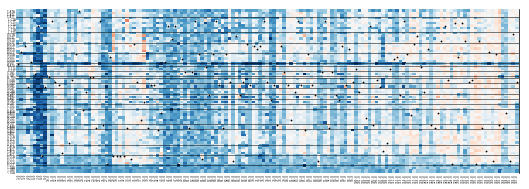

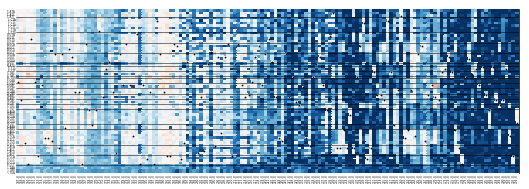

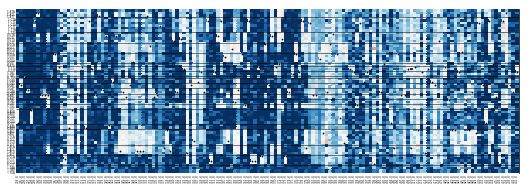

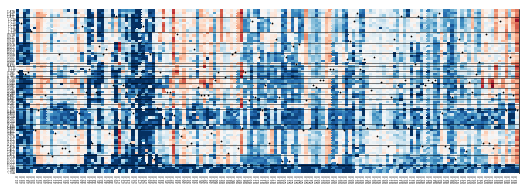

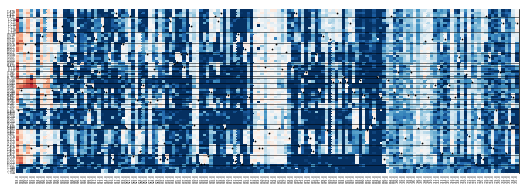

In [9]:
for x in range(0,735, 147):
    plot_heatmap(package_bio_codon_plotting_selection,
                 lib_type='sub', 
                 promoter='CMV',
                 lib_num='0', 
                 range_in=(np.arange(x,x+147+1)),
                 fig_dimensions=[9,3],
                 dot_size=1,
                 text_size=0,
                 tick_size=3,
                 plot_white=False,
                 line_width = .5,
                 min_max = (-5,5),
                 return_df = False,
                 cmap='RdBu_r',
                 plt_cbar=False, 
                 save=True, 
                 save_name = None)

### CMV insertions

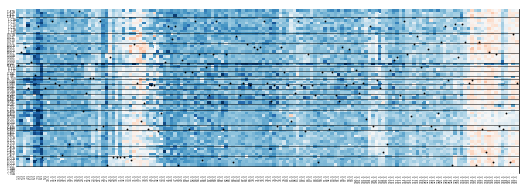

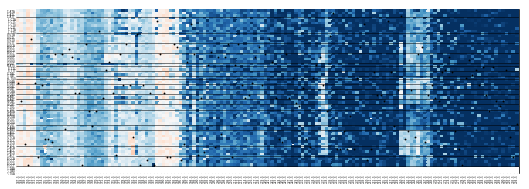

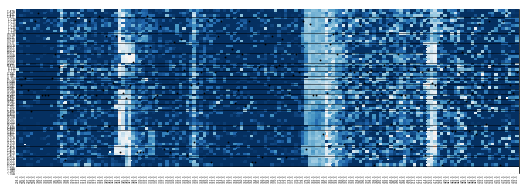

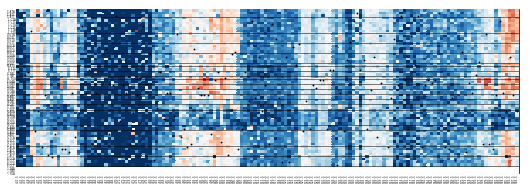

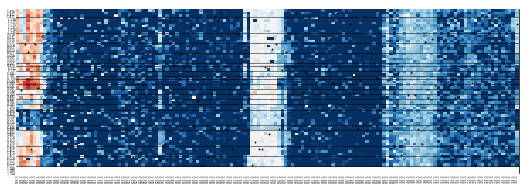

In [10]:
for x in range(0,735, 147):
    plot_heatmap(package_bio_codon_plotting_selection,
                 lib_type='ins', 
                 promoter='CMV',
                 lib_num='0', 
                 range_in=(np.arange(x,x+147+1,.5)),
                 fig_dimensions=[9,3],
                 dot_size=1,
                 text_size=0,
                 tick_size=3,
                 plot_white=False,
                 line_width = .5,
                 min_max = (-5,5),
                 return_df = False,
                cmap='RdBu_r',
                plt_cbar=False, 
                 save=True, 
                save_name = None)

### Rep substitutions 

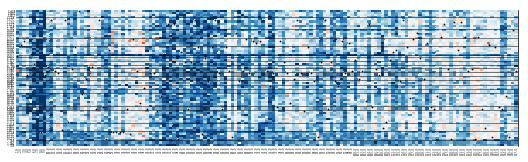

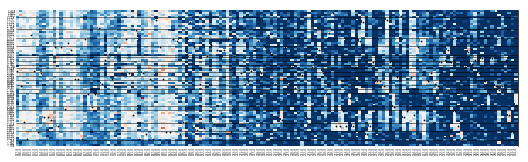

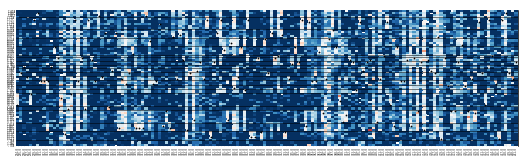

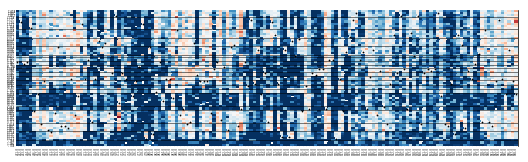

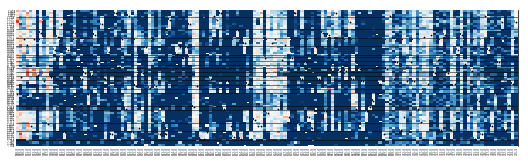

In [11]:
for x in range(0,735, 147):
    plot_heatmap(package_bio_codon_plotting_selection,
                 lib_type='sub', 
                 promoter='Rep',
                 lib_num='0', 
                 range_in=(np.arange(x,x+147+1)),
                 fig_dimensions=[9,2.5],
                 dot_size=1,
                 text_size=0,
                 tick_size=2.7,
                 plot_white=False,
                 line_width = .5,
                 min_max = (-5,5),
                 return_df = False,
                cmap='RdBu_r',
                plt_cbar=False, 
                 save=True, 
                save_name = None)

### Rep Insertions

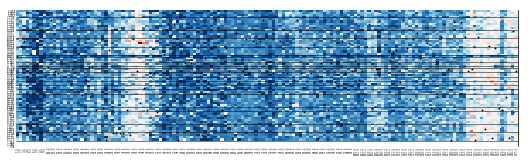

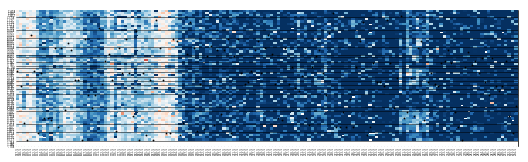

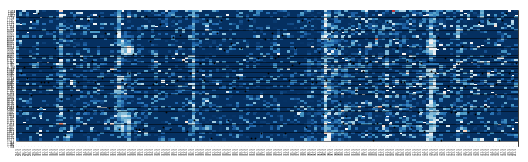

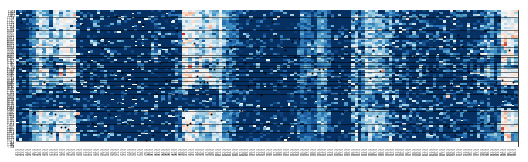

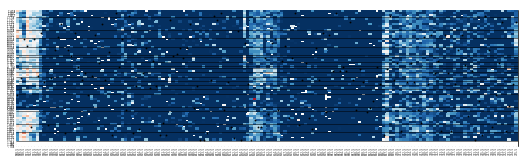

In [12]:
for x in range(0,735, 147):
    plot_heatmap(package_bio_codon_plotting_selection,
                 lib_type='ins', 
                 promoter='Rep',
                 lib_num='0', 
                 range_in=(np.arange(x,x+147+1,.5)),
                 fig_dimensions=[9,2.5],
                 dot_size=1,
                 text_size=0,
                 tick_size=2.7,
                 plot_white=False,
                 line_width = .5,
                 min_max = (-5,5),
                 return_df = False,
                cmap='RdBu_r',
                plt_cbar=False, 
                 save=True, 
                save_name = None)